# Fluxo de passageiros nos Aeroportos em 2018



Aqui está o processo de Extração, Tratamento e Limpeza mais conhecido como (ETL)... O resultado e objetivo desse processo pode ser visualizando acessando o [link](http://juliocesar-data-analyst.herokuapp.com/) do meu blog onde está armazenado a img do dashboarding que representa as informações extraidas a seguir.

## Iniciando o processo de extração

* Bibliotecas

Link para download do [Dataset](https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
pd.set_option('display.max_columns', None) # Configurando a quantidade de colunas visiveis na função head()
df = pd.read_csv('/content/drive/MyDrive/aeroporto/2018.csv', sep=',', encoding='utf-8') # O dataset está armazenado no meu Drive, onde fiz o donwload no kaggle.

## Iniciando o processo de Limpeza e Transformação

* Agencias

In [ ]:
# Renomeando siglas das agencias 
# df.columns
df.replace({'UA':'United Airlines, Inc.', 'AS': 'Alaska Airlines', '9E': 'Endeavor Air', 'B6': 'Jetblue Airways Corporation', 
            'EV': ' ExpressJet Airlines', 'F9': 'Frontier Airlines, Inc.', 'G4': 'Allegiant Air LLC', 'HA': 'Hawaiian Airlines Inc', 
            'MQ': 'Envoy Air', 'NK': 'Spirit Airlines, Inc', 'OH': 'Jetstream Intl','OO': 'Skywest Airlines', 'VX': 'Virgin America', 
            'WN': 'Southwest Airlines', 'YV': 'Mesa Airlines, Inc.', 'YX': 'Republic Airlines', 'AA': 'American Airlines', 'DL': 'Delta Air Lines, Inc'}, inplace=True)

###  Convertendo decolagem e aterrisagem para horas [WHEELS_OFF] - [WHEELS_ON]

*   [WHEELS_OFF]

In [ ]:
df.dropna(subset=['WHEELS_OFF'], inplace=True)
df['WHEELS_OFF'] = df['WHEELS_OFF'].apply(np.int64)
df['WHEELS_OFF'] = pd.to_datetime(df['WHEELS_OFF'], format='%H%M', errors='coerce')

* [WHEELS_ON]

In [ ]:
df.dropna(subset=['WHEELS_ON'], inplace=True)
df['WHEELS_ON'] = df['WHEELS_ON'].apply(np.int64)
df['WHEELS_ON'] = pd.to_datetime(df['WHEELS_ON'], format='%H%M', errors='coerce')

### Visualizando o Tempo de viagem

In [ ]:
df['TempoDeViagem'] = (df['WHEELS_ON'] - df['WHEELS_OFF'])

In [ ]:
df['TempoDeViagem']

0         0 days 01:45:00
1         0 days 01:05:00
2         0 days 02:46:00
3         0 days 01:37:00
4         0 days 02:23:00
                ...      
7213441   0 days 01:12:00
7213442   0 days 01:28:00
7213443   0 days 00:28:00
7213444   0 days 00:26:00
7213445   0 days 00:44:00
Name: TempoDeViagem, Length: 7094200, dtype: timedelta64[ns]

In [ ]:
# [DOCUMENTAÇÃO] - https://bitcoden.com/answers/pandas-extract-hour-from-timedelta

# [TimeDeltaProperties] - df[['WHEELS_OFF', 'WHEELS_ON', 'handling_time_hours']].info()
df['Horas'] = df['TempoDeViagem'].dt.components['hours']
df['Minutos'] = df['TempoDeViagem'].dt.components['minutes']

In [ ]:
media_tempodeviagem = df['TempoDeViagem'].mean()

In [ ]:
# CONCATE VALUES 
df.dropna(subset=['Horas', 'Minutos'], inplace=True)
df['Horas'] = df['Horas'].apply(np.int64).astype("string")
df['Minutos'] = df['Minutos'].apply(np.int64).astype("string")
df['TempoDeViagem'] = df['Horas'] + ':' + df['Minutos']

# FORMATE HORAS
df['WHEELS_OFF'] = df['WHEELS_OFF'].dt.strftime('%H:%M')
df['WHEELS_ON'] = df['WHEELS_ON'].dt.strftime('%H:%M')

In [ ]:
df[['WHEELS_OFF', 'WHEELS_ON', 'TempoDeViagem']]

,WHEELS_OFF,WHEELS_ON,TempoDeViagem
0,15:27,17:12,1:45
1,11:18,12:23,1:5
2,13:45,16:31,2:46
3,16:11,17:48,1:37
4,07:03,09:26,2:23
...,...,...,...
7213441,15:50,17:02,1:12
7213442,18:15,19:43,1:28
7213443,20:46,21:14,0:28
7213444,13:34,14:00,0:26


### Separando as Médias de Eficiência por Aeroportos

#### Filtrando melhores aeroportos por eficiencia.

* Calculando media de eficiencia [DESEMBARQUE]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


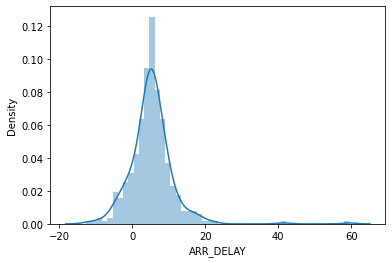

In [ ]:
media_desembarque = df.groupby(['DEST'])['ARR_DELAY'].mean()
quartile25 = np.percentile(media_desembarque, 25)
sn.distplot(media_desembarque);

In [ ]:
MelhorDesembarque = pd.DataFrame(media_desembarque).reset_index()
MelhorDesembarque = MelhorDesembarque[MelhorDesembarque['ARR_DELAY'] < quartile25]
#MelhorDesembarque.head()

* Calculando media de eficiencia [EMBARQUE]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


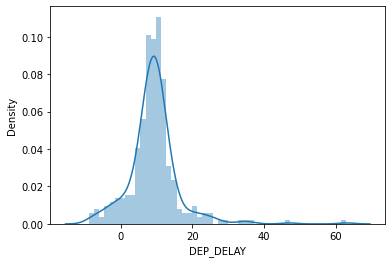

In [ ]:
media_embarque = df.groupby(['ORIGIN'])['DEP_DELAY'].mean()
quartile25 = np.percentile(media_embarque, 25)
sn.distplot(media_embarque);

In [ ]:
MelhorEmbarque = pd.DataFrame(media_embarque).reset_index()
MelhorEmbarque = MelhorEmbarque[MelhorEmbarque['DEP_DELAY'] < quartile25]
#MelhorEmbarque.head()

* Filtrando melhores aeroportos por eficiencia.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc4735e6910>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc4735e6910>)

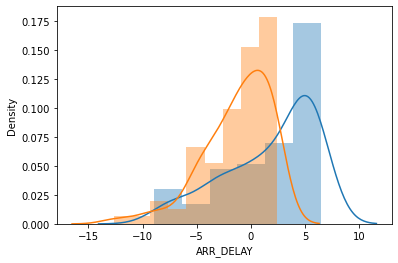

In [ ]:
sn.distplot(MelhorEmbarque['DEP_DELAY']), sn.distplot(MelhorDesembarque['ARR_DELAY']);

In [ ]:
# CONCATENANDO RESULTADOS
MelhorEficiencia = pd.merge(MelhorEmbarque, MelhorDesembarque, left_index=True, right_index=True)
MelhorEficiencia['total'] = MelhorEficiencia['DEP_DELAY'] + MelhorEficiencia['ARR_DELAY']

# FILTRANDO OS 25% COM A MEDIA MAIS EFICIENTE
media_eficiencia = MelhorEficiencia['total']
quartile25 = np.percentile(media_eficiencia, 25)
MelhorEficiencia = MelhorEficiencia[MelhorEficiencia['total'] < quartile25]

# SELECIONANDO OS 10 MELHORES
Top10MelhorEficiencia = MelhorEficiencia.sort_values(by='total', ascending=True).reset_index(drop=True)[:11]
Top10MelhorEficiencia = Top10MelhorEficiencia.rename(columns={"ORIGIN": "AEROPORTO", "DEP_DELAY": "EMBARQUE", "ARR_DELAY": "DESEMBARQUE" , "total": "EFICIENCIA"})

In [ ]:
Top10MelhorEficiencia = Top10MelhorEficiencia[['AEROPORTO', 'EMBARQUE', 'DESEMBARQUE', 'EFICIENCIA']]

#### Filtrando Piores aeroportos por eficiencia.

* Extraindo a pior media de tempo dá Eficiencia no [EMBARQUE]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


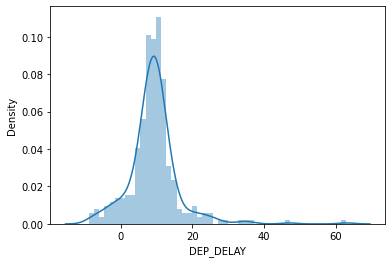

In [ ]:
media_pior_embarque = df.groupby(['ORIGIN'])['DEP_DELAY'].mean()
quartile75 = np.percentile(media_pior_embarque, 75)
sn.distplot(media_pior_embarque)

In [ ]:
PiorEmbarque = pd.DataFrame(media_pior_embarque).reset_index()
PiorEmbarque = PiorEmbarque[PiorEmbarque['DEP_DELAY'] > quartile75]

* Extraindo a pior media de tempo dá Eficiencia no [DESEMBARQUE]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


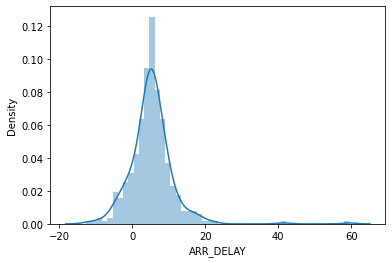

In [ ]:
media_pior_desembarque = df.groupby(['DEST'])['ARR_DELAY'].mean()
quartile75 = np.percentile(media_pior_desembarque, 75)
sn.distplot(media_pior_desembarque)

In [ ]:
PiorDesembarque = pd.DataFrame(media_pior_desembarque).reset_index()
PiorDesembarque = PiorDesembarque[PiorDesembarque['ARR_DELAY'] > quartile75]

* Filtrando piores aeroportos por eficiencia.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc472dd8890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc472dd8890>)

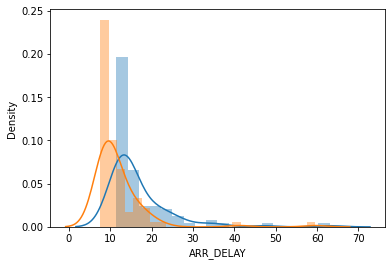

In [ ]:
sn.distplot(PiorEmbarque['DEP_DELAY']), sn.distplot(PiorDesembarque['ARR_DELAY'])

In [ ]:
# CONCATENANDO RESULTADOS
PiorEficiencia = pd.merge(PiorEmbarque, PiorDesembarque, left_index=True, right_index=True)
PiorEficiencia['total'] = PiorEficiencia['DEP_DELAY'] + PiorEficiencia['ARR_DELAY']

# FILTRANDO OS 75% COM A PIOR MEDIA DE EFICIENCIA
media_pior_eficiencia = PiorEficiencia['total']
quartile75 = np.percentile(media_pior_eficiencia, 75)
PiorEficiencia = PiorEficiencia[PiorEficiencia['total'] < quartile75]

# SELECIONANDO OS 10 MELHORES
Top10PiorEficiencia = PiorEficiencia.sort_values(by='total', ascending=True).reset_index(drop=True)[:11]
Top10PiorEficiencia = Top10PiorEficiencia.rename(columns={"ORIGIN": "AEROPORTO", "DEP_DELAY": "EMBARQUE", "ARR_DELAY": "DESEMBARQUE" , "total": "EFICIENCIA"})

In [ ]:
Top10PiorEficiencia = Top10PiorEficiencia[['AEROPORTO', 'EMBARQUE', 'DESEMBARQUE', 'EFICIENCIA']]

#### Comparando os Filtros

In [ ]:
Top10PiorEficiencia

,AEROPORTO,EMBARQUE,DESEMBARQUE,EFICIENCIA
0,SBN,11.974989,8.023321,19.998310
1,ORD,12.089051,8.007464,20.096515
2,RIC,12.115888,8.297556,20.413444
3,CRW,12.427360,8.057026,20.484386
4,BOS,12.160863,8.477968,20.638830
5,EAU,11.502152,9.538240,21.040392
6,AVL,11.611883,9.487671,21.099553
7,SUX,12.181897,9.081953,21.263850
8,LGA,12.188961,9.229375,21.418335
9,JLN,12.750958,8.721717,21.472674


In [ ]:
Top10MelhorEficiencia

,AEROPORTO,EMBARQUE,DESEMBARQUE,EFICIENCIA
0,BRW,-7.165498,-10.609859,-17.775357
1,EAR,-7.884422,-4.727273,-12.611695
2,YAK,-8.909732,-3.577247,-12.486979
3,SCC,-7.927711,-3.318478,-11.246189
4,LWS,-2.472067,-7.641350,-10.113417
5,OME,-5.186047,-4.721980,-9.908026
6,BET,-4.766378,-4.774752,-9.541131
7,BTM,0.750000,-8.980480,-8.230480
8,PSG,-6.971950,-0.949509,-7.921459
9,OTZ,-3.409621,-4.475504,-7.885125




###  Extraindo os meses de data


In [ ]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [ ]:
meses = {
    'January' : 'Janeiro',
    'February' : 'Fevereiro',
    'March' : 'Março',
    'April' : 'Abril',
    'May' : 'Maio',
    'June' : 'Junho',
    'July' : 'Julho',
    'August' : 'Agosto',
    'September' : 'Setembro',
    'October' : 'Outubro',
    'November' : 'Novembro',
    'December' : 'Dezembro',
}
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['MESES'] = df['FL_DATE'].dt.month_name().rename(meses)

In [ ]:
df['MESES'] = df['FL_DATE'].dt.month_name().replace(meses)

* Extraindo o dataframe

In [ ]:
col = {
    'FL_DATE': 'DATA',
    'OP_CARRIER': 'EMPRESA',
    'ORIGIN': 'AEROPORTO',
    'CANCELLED': 'CANCELADOS',
    'DEP_DELAY': 'EMBARQUE',
    'ARR_DELAY': 'DESEMBARQUE',
}
dataframe = df[['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'CANCELLED', 'DEP_DELAY', 'ARR_DELAY']].rename(columns=col)

In [ ]:
lista = list(Top10MelhorEficiencia['AEROPORTO'].unique())
df_melhores = dataframe.query(f"AEROPORTO=={lista}")

In [ ]:
lista = list(Top10PiorEficiencia['AEROPORTO'].unique())
df_piores = dataframe.query(f"AEROPORTO=={lista}")

### Salvando arquivos csv para visualizar no powebi

In [ ]:
df_melhores.to_csv('AeroportoMelhores2018.csv')

In [ ]:
df_piores.to_csv('AeroportoPiores2018.csv')

In [ ]:
Top10MelhorEficiencia.to_csv('MelhorEficiencia.csv')

In [ ]:
Top10PiorEficiencia.to_csv('PiorEficiencia.csv')